### 1. Mount Google Drive

This cell mounts your Google Drive to the Colab environment, allowing access to files stored in your Drive, such as the dataset zip file. This is a common first step when working with datasets stored in cloud storage.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2. Prepare for Data Extraction

This cell imports necessary libraries (`zipfile` for handling zip archives and `os` for interacting with the operating system), defines the path to the zipped dataset on Google Drive, and specifies a local directory where the contents will be extracted. It also creates the extraction directory if it doesn't already exist.

In [2]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/first_project/PRCP-1001-RiceLeaf.zip"
extract_path = "RiceLeaf"

os.makedirs(extract_path, exist_ok=True)

### 3. Extract Main Dataset Zip File

This cell uses the `zipfile` module to extract all contents of the main `PRCP-1001-RiceLeaf.zip` file into the `RiceLeaf` directory. This makes the dataset accessible for further processing.

In [3]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(" Zip Extracted Successfully")

 Zip Extracted Successfully


### 4. Extract Nested Data Folders

The main zip file contains a 'Data' folder, which in turn holds several smaller zip files, each corresponding to a specific rice leaf disease category. This cell iterates through these inner zip files, creates dedicated folders for each, and extracts their contents. This organizes the image data into distinct class directories, which is essential for `ImageDataGenerator`.

In [4]:
data_folder = os.path.join(extract_path, "Data")

for file in os.listdir(data_folder):
    if file.endswith(".zip"):
        zip_path = os.path.join(data_folder, file)

        folder_name = file.replace(".zip", "")
        extract_inner = os.path.join(extract_path, folder_name)

        os.makedirs(extract_inner, exist_ok=True)

        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_inner)

        print(f"{file} extracted")

Brown spot-20200814T055208Z-001.zip extracted
Leaf smut-20200814T055530Z-001.zip extracted
Bacterial leaf blight-20200814T055237Z-001.zip extracted


### 5. Remove Redundant Data Folder

After extracting the nested zip files, the original 'Data' folder (which contained the inner zip files) is no longer needed. This cell removes that folder to clean up the directory structure and save space.

In [5]:
import shutil
shutil.rmtree(data_folder)
print("Old Data folder removed")

Old Data folder removed


### 6. Visualize Sample Images from Each Category

This cell iterates through the extracted disease category folders, identifies the actual image directories within them, and displays the first 5 images from each category using `matplotlib` and `PIL` (Pillow). This provides a visual inspection of the dataset and confirms correct data organization.


 Bacterial leaf blight


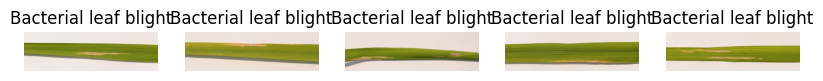


 Leaf smut


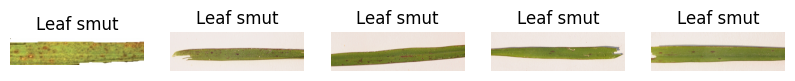


 Brown spot


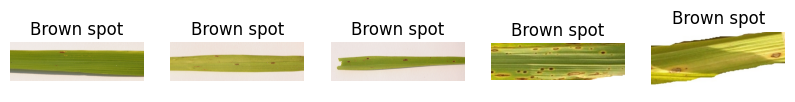

In [6]:
import os
import matplotlib.pyplot as plt
from PIL import Image

data_folder_root = "/content/RiceLeaf"

for folder_dated in os.listdir(data_folder_root):
    path_to_dated_folder = os.path.join(data_folder_root, folder_dated)

    if os.path.isdir(path_to_dated_folder):

        subfolders = [d for d in os.listdir(path_to_dated_folder) if os.path.isdir(os.path.join(path_to_dated_folder, d))]

        if subfolders:
            image_category_name = subfolders[0]
            actual_image_dir = os.path.join(path_to_dated_folder, image_category_name)

            print(f"\n {image_category_name}")

            images = [f for f in os.listdir(actual_image_dir) if os.path.isfile(os.path.join(actual_image_dir, f))]
            images_to_display = images[:5]

            if images_to_display:
                plt.figure(figsize=(10, 3))

                for i, img_name in enumerate(images_to_display):
                    img_path = os.path.join(actual_image_dir, img_name)
                    try:
                        img = Image.open(img_path)

                        plt.subplot(1, 5, i+1)
                        plt.imshow(img)
                        plt.title(image_category_name)
                        plt.axis("off")
                    except Exception as e:
                        print(f"Error opening image {img_name} in {actual_image_dir}: {e}")
                plt.show()
            else:
                print(f"No image files found in {actual_image_dir}")

### 7. Define Image Category Paths

This cell explicitly defines variables for the full file paths to each of the three image categories: 'Bacterial leaf blight', 'Brown spot', and 'Leaf smut'. These paths will be used in subsequent steps to access the image data.

In [7]:
image_path ="/content/RiceLeaf/Bacterial leaf blight-20200814T055237Z-001/Bacterial leaf blight"
brownspot_path ="/content/RiceLeaf/Brown spot-20200814T055208Z-001/Brown spot"
leaf_smut = "/content/RiceLeaf/Leaf smut-20200814T055530Z-001/Leaf smut"

### 8. Import Matplotlib (if not already imported)

This cell imports the `matplotlib.pyplot` and `matplotlib.image` modules, which are essential for displaying images and plotting data. This ensures these functionalities are available for subsequent visualization steps.

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### 9. Count Images per Category

This cell counts the number of images present in each of the three disease categories. It iterates through the defined folder paths and uses `os.listdir()` to get a count of files. This helps in understanding the dataset distribution.

In [9]:
import os

folders = {
    "Bacterial leaf blight": image_path,
    "Brown spot": brownspot_path,
    "Leaf smut": leaf_smut
}

for name, path in folders.items():
    count = len(os.listdir(path))
    print(f"{name} : {count} images")

Bacterial leaf blight : 40 images
Brown spot : 40 images
Leaf smut : 39 images


### 10. Display Sample Images from 'Bacterial Leaf Blight'

This cell loads and displays the first 10 images from the 'Bacterial leaf blight' category. For each image, it prints the file path and its shape (height, width, channels) and then visualizes the image using `matplotlib`. This provides a detailed look at the image dimensions and content within this specific class.

/content/RiceLeaf/Bacterial leaf blight-20200814T055237Z-001/Bacterial leaf blight/DSC_0380.JPG
shape: (897, 3081, 3)


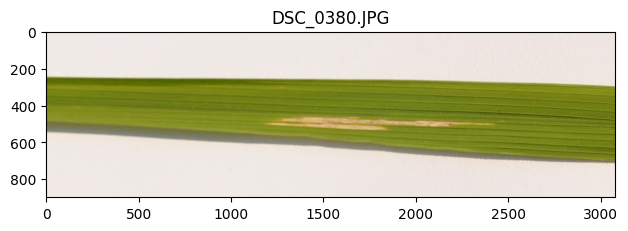

/content/RiceLeaf/Bacterial leaf blight-20200814T055237Z-001/Bacterial leaf blight/DSC_0393.JPG
shape: (897, 3081, 3)


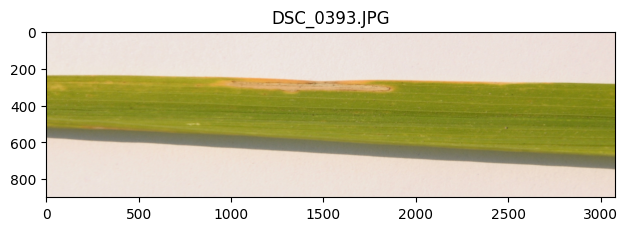

/content/RiceLeaf/Bacterial leaf blight-20200814T055237Z-001/Bacterial leaf blight/DSC_0397.JPG
shape: (897, 3081, 3)


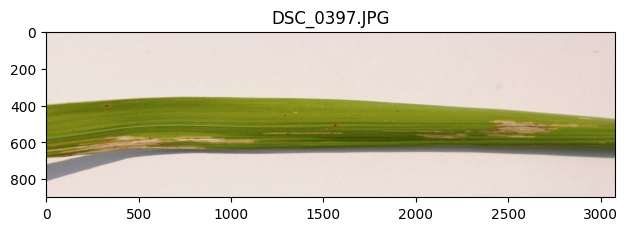

/content/RiceLeaf/Bacterial leaf blight-20200814T055237Z-001/Bacterial leaf blight/DSC_0390.JPG
shape: (897, 3081, 3)


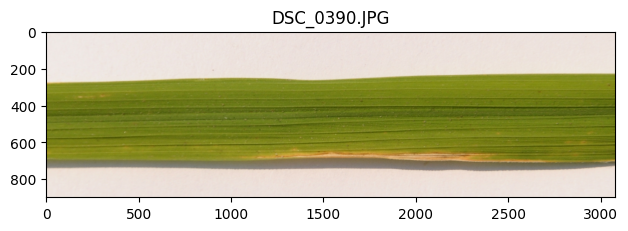

/content/RiceLeaf/Bacterial leaf blight-20200814T055237Z-001/Bacterial leaf blight/DSC_0399.JPG
shape: (897, 3081, 3)


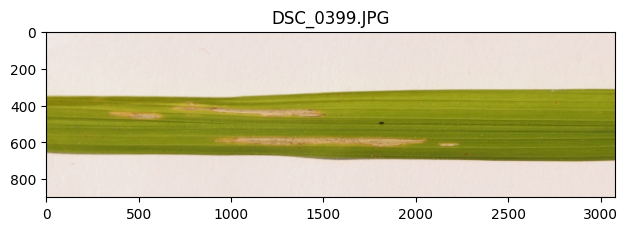

/content/RiceLeaf/Bacterial leaf blight-20200814T055237Z-001/Bacterial leaf blight/DSC_0702.jpg
shape: (897, 3081, 3)


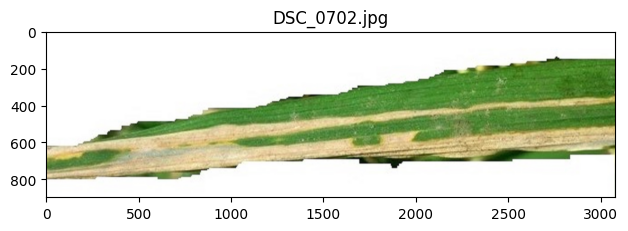

/content/RiceLeaf/Bacterial leaf blight-20200814T055237Z-001/Bacterial leaf blight/DSC_0385.jpg
shape: (897, 3081, 3)


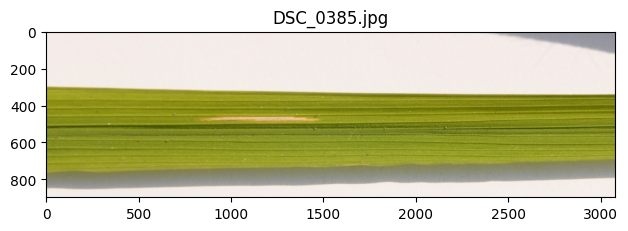

/content/RiceLeaf/Bacterial leaf blight-20200814T055237Z-001/Bacterial leaf blight/DSC_0406.JPG
shape: (897, 3081, 3)


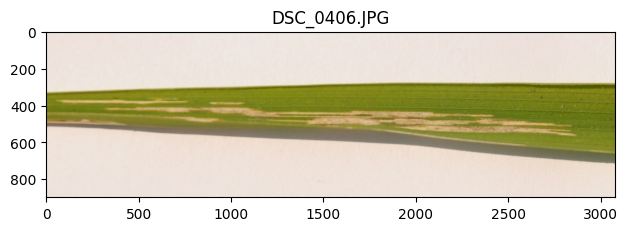

/content/RiceLeaf/Bacterial leaf blight-20200814T055237Z-001/Bacterial leaf blight/DSC_0403.JPG
shape: (897, 3081, 3)


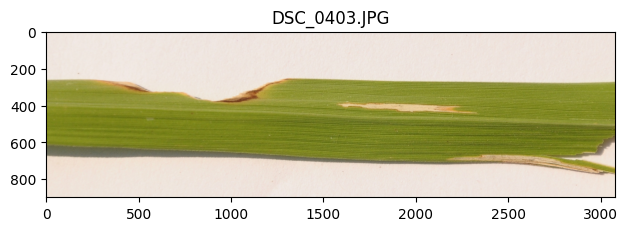

/content/RiceLeaf/Bacterial leaf blight-20200814T055237Z-001/Bacterial leaf blight/DSC_0366.jpg
shape: (897, 3081, 3)


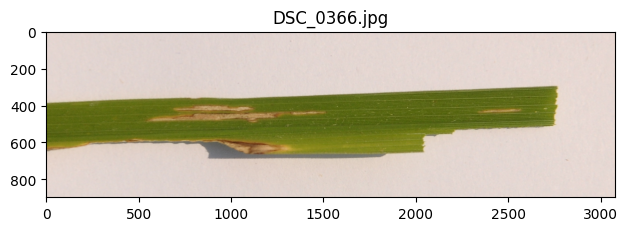

In [10]:
for fil in os.listdir(image_path)[:10]:
  path =os.path.join(image_path,fil)
  print(path)
  img = mpimg.imread(path)
  print("shape:",img.shape)
  plt.title(fil)
  plt.imshow(img)
  plt.tight_layout()
  plt.show()

### 11. Display Sample Images from 'Brown Spot'

Similar to the previous step, this cell loads and displays the first 10 images from the 'Brown spot' category. It prints the file path and image shape, then shows each image. This allows for visual inspection of the image characteristics for the 'Brown spot' class.

/content/RiceLeaf/Brown spot-20200814T055208Z-001/Brown spot/DSC_0394.jpg
shape: (897, 3081, 3)


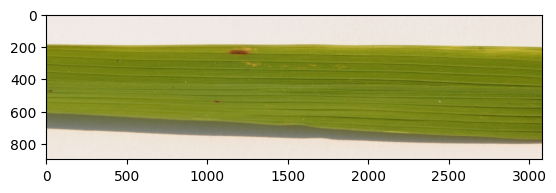

/content/RiceLeaf/Brown spot-20200814T055208Z-001/Brown spot/DSC_0304.JPG
shape: (897, 3081, 3)


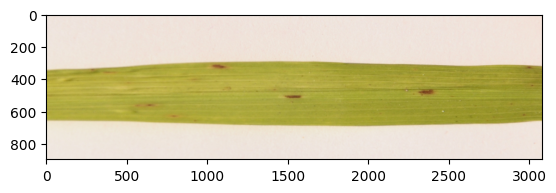

/content/RiceLeaf/Brown spot-20200814T055208Z-001/Brown spot/DSC_0337.JPG
shape: (897, 3081, 3)


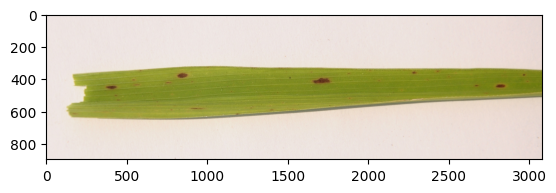

/content/RiceLeaf/Brown spot-20200814T055208Z-001/Brown spot/DSC_0116.jpg
shape: (94, 340, 3)


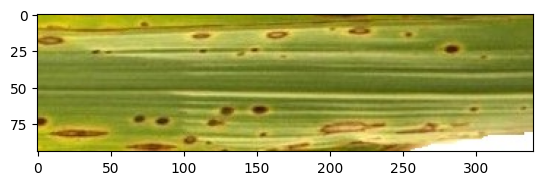

/content/RiceLeaf/Brown spot-20200814T055208Z-001/Brown spot/DSC_0112.jpg
shape: (193, 427, 3)


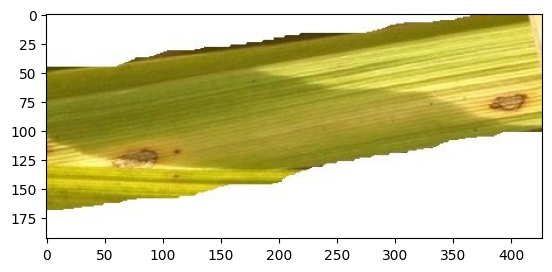

/content/RiceLeaf/Brown spot-20200814T055208Z-001/Brown spot/DSC_0121.jpg
shape: (900, 1200, 3)


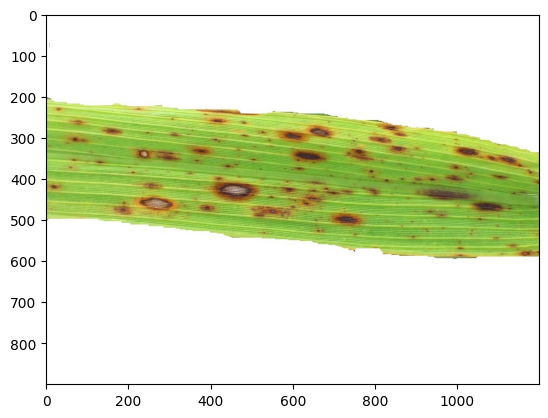

/content/RiceLeaf/Brown spot-20200814T055208Z-001/Brown spot/DSC_0100.jpg
shape: (250, 766, 3)


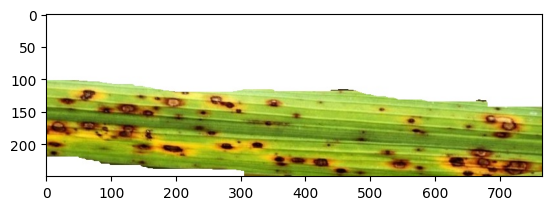

/content/RiceLeaf/Brown spot-20200814T055208Z-001/Brown spot/DSC_0119.jpg
shape: (170, 311, 3)


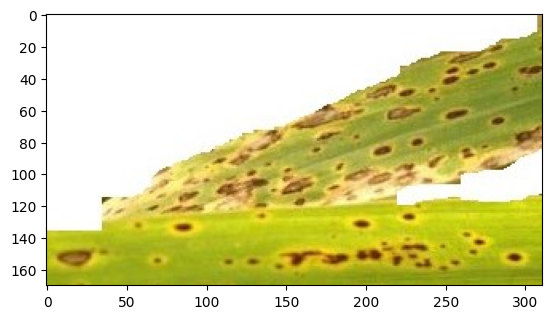

/content/RiceLeaf/Brown spot-20200814T055208Z-001/Brown spot/DSC_0306.JPG
shape: (897, 3081, 3)


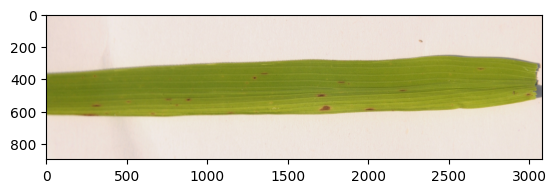

/content/RiceLeaf/Brown spot-20200814T055208Z-001/Brown spot/DSC_0333.JPG
shape: (897, 3081, 3)


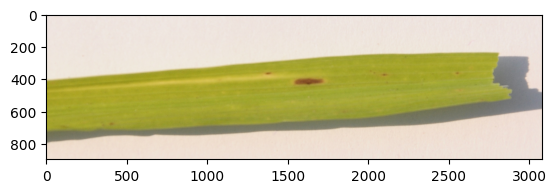

In [11]:
for brown_img in os.listdir(brownspot_path)[:10]:
  path =os.path.join(brownspot_path,brown_img)
  print(path)
  img = mpimg.imread(path)
  print("shape:",img.shape)
  plt.imshow(img)
  plt.show()

### 12. Display Sample Images from 'Leaf Smut' with Shapes

This cell displays the first 10 images from the 'Leaf smut' category in a grid format. For each image, it also adds the image's shape (dimensions) as the title. This helps in understanding the varying resolutions and aspect ratios of images within this class.

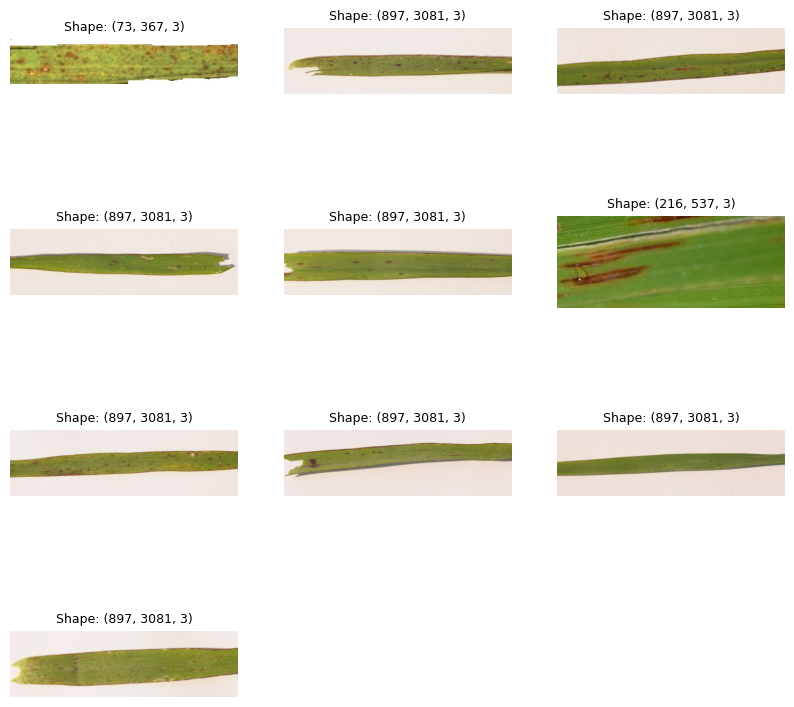

In [12]:
plt.figure(figsize=(10,10))

for i, img_name in enumerate(os.listdir(leaf_smut)[:10]):
    img_path = os.path.join(leaf_smut, img_name)

    img = mpimg.imread(img_path)

    plt.subplot(4, 3, i+1)
    plt.imshow(img)

    # 🔹 shape image ke upar
    plt.title(f"Shape: {img.shape}", fontsize=9)

    plt.axis('off')

plt.show()

### 13. Another Display of Sample Images from 'Leaf Smut'

This cell provides another iteration of displaying sample images from the 'Leaf smut' category, similar to the previous one. It prints the file path and image shape before showing each image, offering another look at the data.

/content/RiceLeaf/Leaf smut-20200814T055530Z-001/Leaf smut/DSC_0501.jpg
DSC_0501.jpg => (73, 367, 3)


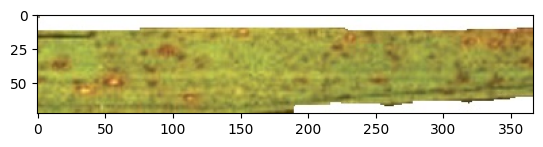

/content/RiceLeaf/Leaf smut-20200814T055530Z-001/Leaf smut/DSC_0318.JPG
DSC_0318.JPG => (897, 3081, 3)


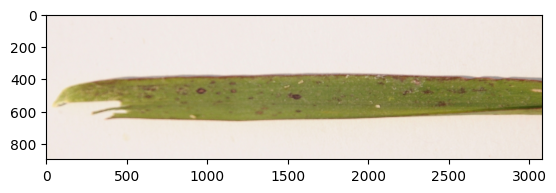

/content/RiceLeaf/Leaf smut-20200814T055530Z-001/Leaf smut/DSC_0308.JPG
DSC_0308.JPG => (897, 3081, 3)


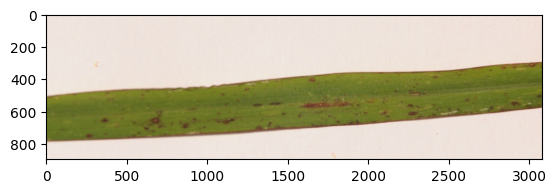

/content/RiceLeaf/Leaf smut-20200814T055530Z-001/Leaf smut/DSC_0293.JPG
DSC_0293.JPG => (897, 3081, 3)


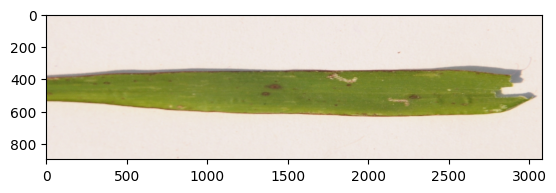

/content/RiceLeaf/Leaf smut-20200814T055530Z-001/Leaf smut/DSC_0316.JPG
DSC_0316.JPG => (897, 3081, 3)


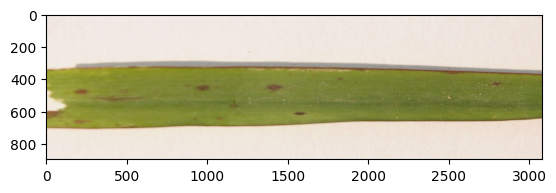

/content/RiceLeaf/Leaf smut-20200814T055530Z-001/Leaf smut/DSC_0510.jpg
DSC_0510.jpg => (216, 537, 3)


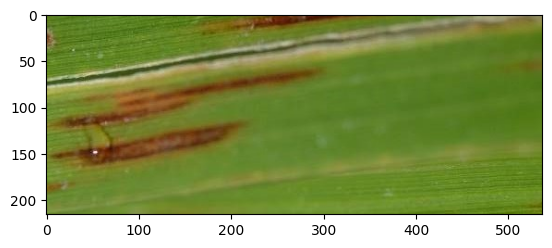

/content/RiceLeaf/Leaf smut-20200814T055530Z-001/Leaf smut/DSC_0313.JPG
DSC_0313.JPG => (897, 3081, 3)


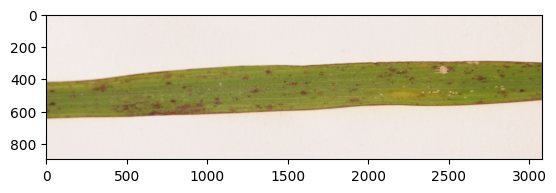

/content/RiceLeaf/Leaf smut-20200814T055530Z-001/Leaf smut/DSC_0330.jpg
DSC_0330.jpg => (897, 3081, 3)


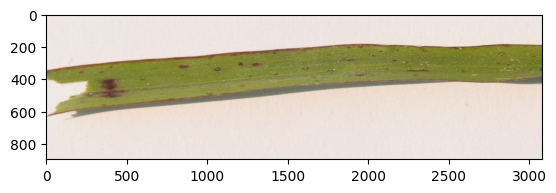

/content/RiceLeaf/Leaf smut-20200814T055530Z-001/Leaf smut/DSC_0336.jpg
DSC_0336.jpg => (897, 3081, 3)


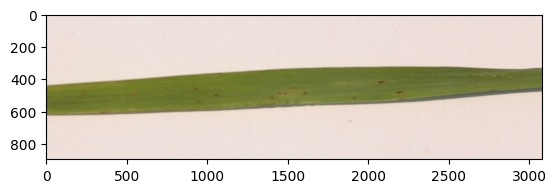

/content/RiceLeaf/Leaf smut-20200814T055530Z-001/Leaf smut/DSC_0320.JPG
DSC_0320.JPG => (897, 3081, 3)


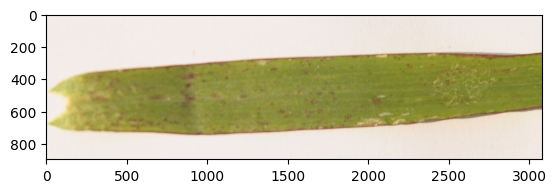

In [13]:
path_os = os.listdir(leaf_smut)

for i in path_os[0:10]:
    joint =os.path.join(leaf_smut, i)
    print(joint)
    am = mpimg.imread(joint)
    print(i, "=>", am.shape)
    plt.imshow(am)
    plt.show()

### 14. Configure Image Data Generators for CNN Training

This crucial cell sets up `ImageDataGenerator` instances for both training and validation datasets. It performs several key preprocessing steps:

*   **Rescaling:** Normalizes pixel values from [0, 255] to [0, 1].
*   **Data Augmentation (for training):** Applies various transformations (rotation, shifts, shear, zoom, flip, brightness changes) to artificially expand the training set and prevent overfitting.
*   **Target Size:** Resizes all images to a consistent `(224, 224)`.
*   **Batch Size:** Organizes images into batches for efficient model training.
*   **Class Mode:** Sets the class mode to 'categorical' for one-hot encoded labels.
*   **Validation Split:** Splits the dataset into training and validation subsets.

These generators are vital for feeding preprocessed and augmented image data to the CNN during training.

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# 2. Training Generator
train_generator = datagen.flow_from_directory(
    "/content/RiceLeaf",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

# 3. Validation Generator
validation_generator = datagen.flow_from_directory(
    "/content/RiceLeaf",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

Found 96 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


### 15. Define the Convolutional Neural Network (CNN) Model Architecture

This cell defines a sequential CNN model using Keras. The architecture includes:

*   **Convolutional Layers (`Conv2D`):** Extract features from images using filters.
*   **Max Pooling Layers (`MaxPooling2D`):** Reduce spatial dimensions, making the model more robust to variations.
*   **Batch Normalization (`BatchNormalization`):** Stabilizes and accelerates the training process.
*   **Flatten Layer (`Flatten`):** Converts the 2D feature maps into a 1D vector.
*   **Dense Layers (`Dense`):** Fully connected layers for classification.
*   **Dropout Layer (`Dropout`):** Prevents overfitting by randomly setting a fraction of input units to 0 at each update during training.
*   **Softmax Activation:** The final layer uses softmax to output probabilities for the 3 distinct classes.

In [22]:
model = Sequential([

    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')   # 3 classes
])

### 16. Compile and Summarize the CNN Model

This cell compiles the defined CNN model, specifying the optimizer, loss function, and evaluation metrics:

*   **Optimizer (`adam`):** An adaptive learning rate optimization algorithm.
*   **Loss Function (`categorical_crossentropy`):** Suitable for multi-class classification with one-hot encoded labels.
*   **Metrics (`accuracy`):** Measures the classification accuracy.

It then prints a summary of the model's architecture, showing the layers, output shapes, and the number of trainable parameters.

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,243 (42.61 MB)

 Trainable params: 11,169,795 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

### 17. Train the CNN Model

This cell initiates the training process for the CNN model using the prepared `train_generator` and `validation_generator`. The model is trained for 20 epochs, and `steps_per_epoch` and `validation_steps` are calculated to ensure all samples are covered per epoch. The training history (loss and accuracy) is stored for later visualization.

In [24]:
# Train model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4271 - loss: 9.7706 - val_accuracy: 0.3478 - val_loss: 2.6561
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 861ms/step - accuracy: 0.5651 - loss: 6.6368 - val_accuracy: 0.3478 - val_loss: 2.5053
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 898ms/step - accuracy: 0.4948 - loss: 8.7309 - val_accuracy: 0.3478 - val_loss: 6.9310
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6185 - loss: 6.4705 - val_accuracy: 0.3478 - val_loss: 8.8098
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 903ms/step - accuracy: 0.5833 - loss: 9.6607 - val_accuracy: 0.3478 - val_loss: 11.1703
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 884ms/step - accuracy: 0.5807 - loss: 4.7612 - val_accuracy: 0.3478 - val_loss: 7.6040
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 882ms/step - accuracy: 0.6471 - loss: 5.1921 - val_accuracy: 0.3478 - val_loss: 6.6342
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 927ms/step - accuracy: 0.5612 - loss: 8.2641 - val_accuracy: 0.3478 - val_loss: 8.5

### 18. Plot Training and Validation Accuracy

This cell visualizes the training and validation accuracy over the epochs. The plot helps in assessing the model's learning progress and identifying potential overfitting (if validation accuracy plateaus or drops while training accuracy continues to rise).

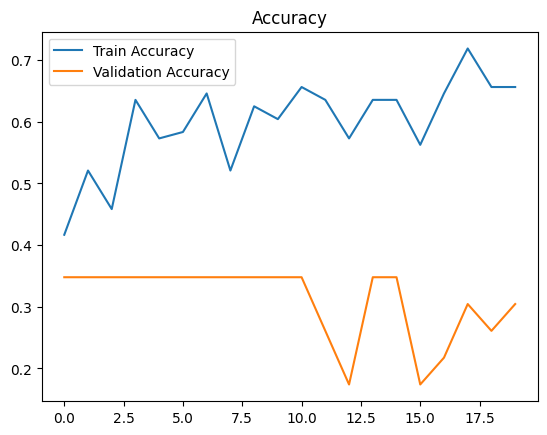

In [25]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

### 19. Plot Training and Validation Loss

This cell visualizes the training and validation loss over the epochs. The loss plot is crucial for understanding how well the model is minimizing its error on both seen and unseen data, helping to identify convergence issues or overfitting.

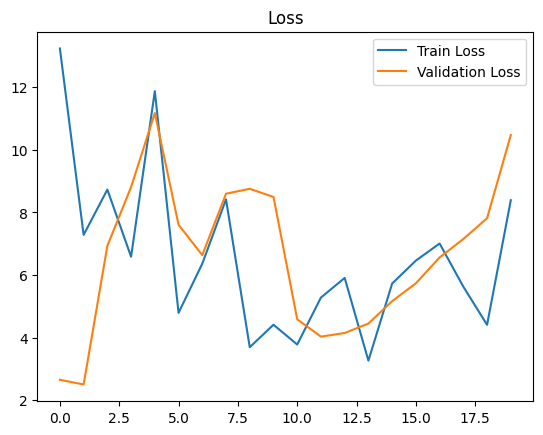

In [26]:

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

### 20. Introduce Transfer Learning (MobileNetV2)

This cell introduces the concept of transfer learning by utilizing a pre-trained `MobileNetV2` model. MobileNetV2 is a lightweight deep neural network designed for mobile and embedded vision applications. Using `weights='imagenet'` initializes the model with weights learned from the vast ImageNet dataset. `include_top=False` excludes the original classification head, allowing a custom head to be added for our specific 3-class problem. `base_model.trainable = False` freezes the weights of the pre-trained layers to leverage their learned features without altering them during initial training of the new head.

A new classification head is then added, consisting of a `GlobalAveragePooling2D` layer, a `Dense` layer with ReLU activation, a `Dropout` layer for regularization, and a final `Dense` layer with `softmax` activation for the 3 output classes. The new `model_two` is compiled with the `adam` optimizer and `categorical_crossentropy` loss.

In [51]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze pretrained layers

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(98, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(3, activation='softmax')(x)

model_two = Model(inputs=base_model.input, outputs=output)
model_two.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 21. Train the Transfer Learning Model with Early Stopping

This cell trains the `model_two` (MobileNetV2 with a custom head) using the `train_generator` and `validation_generator`. It incorporates `EarlyStopping`, a callback that monitors a specified metric (here, `val_loss`) and stops training if no improvement is observed for a certain number of epochs (`patience=5`). `restore_best_weights=True` ensures that the model weights from the epoch with the best monitored value are restored.

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_two = model_two.fit(train_generator, validation_data=validation_generator, epochs=50, callbacks=[es])

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.3685 - loss: 1.3431 - val_accuracy: 0.5217 - val_loss: 0.8913
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 898ms/step - accuracy: 0.4102 - loss: 1.1907 - val_accuracy: 0.7391 - val_loss: 0.7964
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 927ms/step - accuracy: 0.5846 - loss: 0.8624 - val_accuracy: 0.8261 - val_loss: 0.5974
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 926ms/step - accuracy: 0.5677 - loss: 0.9662 - val_accuracy: 0.9130 - val_loss: 0.4740
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7057 - loss: 0.7335 - val_accuracy: 0.9565 - val_loss: 0.3866
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 843ms/step - accuracy: 0.7122 - loss: 0.6428 - val_accuracy: 0.8696 - val_loss: 0.4302
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 900ms/step - accuracy: 0.7891 - loss: 0.6100 - val_accuracy: 0.9130 - val_loss: 0.3971
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 904ms/step - accuracy: 0.7122 - loss: 0.6413 - val_accuracy: 0.7391 - val_loss: 0.43

### 22. Evaluate the Transfer Learning Model

This cell evaluates the performance of the trained `model_two` on the validation set. It calculates and prints the final validation loss and accuracy, providing a quantitative measure of how well the model generalizes to unseen data.

In [56]:
# Evaluate on validation set
val_loss, val_acc = model_two.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.8261 - loss: 0.3467
Validation Accuracy: 82.61%


### 23. Plot Transfer Learning Training and Validation Accuracy

This cell visualizes the training and validation accuracy of the transfer learning model (`model_two`) over the epochs. This plot is essential for understanding the learning curve, detecting overfitting, and observing the impact of early stopping.

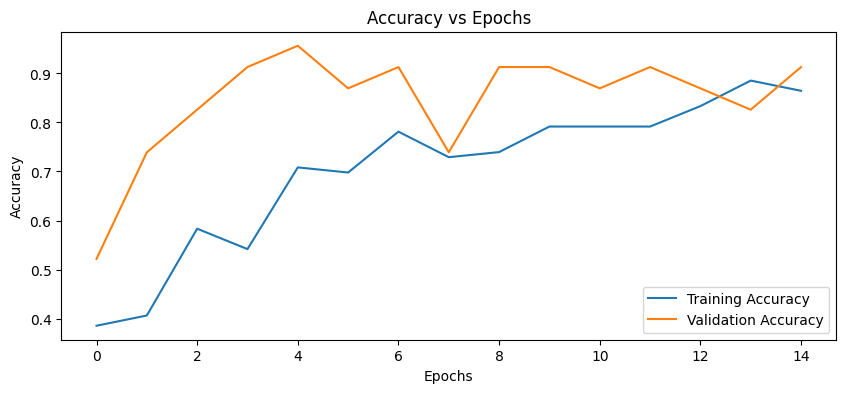

In [57]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10,4))
plt.plot(history_two.history['accuracy'], label='Training Accuracy')
plt.plot(history_two.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 24. Plot Transfer Learning Training and Validation Loss

This cell visualizes the training and validation loss of the transfer learning model (`model_two`) over the epochs. This plot provides insight into how well the model is minimizing its error during training and on unseen validation data, indicating convergence and potential issues.

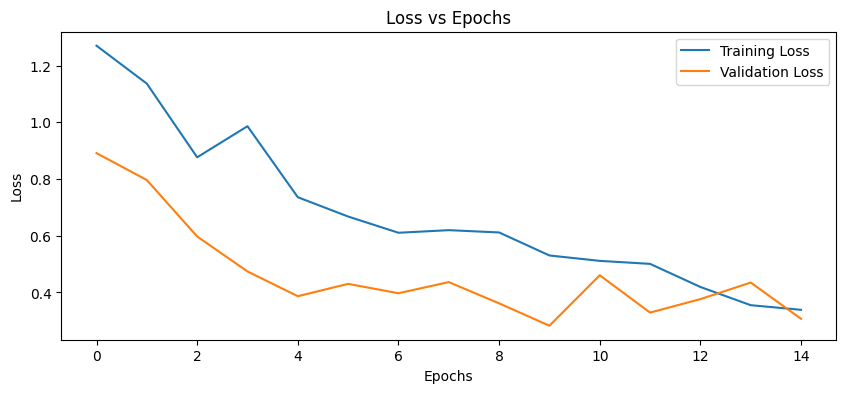

In [58]:
# Plot Loss
plt.figure(figsize=(10,4))
plt.plot(history_two.history['loss'], label='Training Loss')
plt.plot(history_two.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 25. Save the Trained Model

This cell saves the trained `model_two` (the transfer learning model) to a file named `rice_leaf_disease_model.keras`. Saving the model allows it to be reloaded later without retraining, enabling its use for predictions or deployment.

In [60]:
model_two.save("rice_leaf_disease_model.h5")
print("Model saved as rice_leaf_disease_model.h5")

Model saved as rice_leaf_disease_model.h5


In [65]:
model_two.save("Rice_leaf_disease_model.keras")

### 26. Load the Saved Model

This cell demonstrates how to load a previously saved Keras model from disk. The `load_model` function reconstructs the model architecture and loads its trained weights, making it ready for inference.

In [61]:
from tensorflow.keras.models import load_model

model_load = load_model("rice_leaf_disease_model.h5")

print("Model loaded successfully")

Model loaded successfully


### 27. Define Prediction Function

This cell defines a function `predict_with_name` that takes an image path as input, preprocesses the image (resizes, normalizes, expands dimensions), uses the loaded model to make a prediction, and then displays the image along with the predicted class name and confidence score. This function streamlines the process of making and visualizing individual predictions.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_with_name(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model_load.predict(img_array)
    pred_index = np.argmax(pred)
    class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
    pred_name = class_names[pred_index]
    confidence = np.max(pred) * 100

    plt.imshow(img)
    plt.title(f"Prediction: {pred_name} ({confidence:.2f}%)")
    plt.axis("off")
    plt.show()

    return pred_name, confidence

### 28. Test Prediction Function

This cell calls the `predict_with_name` function with a sample image path (`/content/brown_spot.jpg`) to demonstrate its functionality. It will load the image, make a prediction using the loaded model, and display the image with the predicted class and confidence.

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


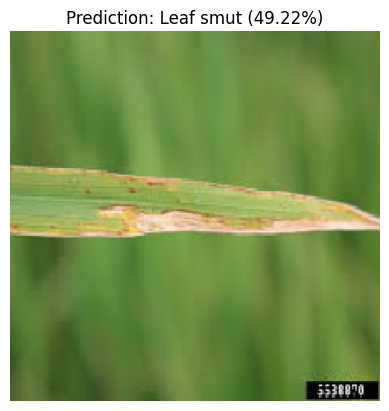

('Leaf smut', np.float32(49.221443))

In [64]:

predict_with_name("/content/images (1).jpg")